In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
df=pd.read_csv('/content/drive/MyDrive/uas/ObesityDataSet.csv')

In [28]:
 df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [29]:
# Display general information and the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


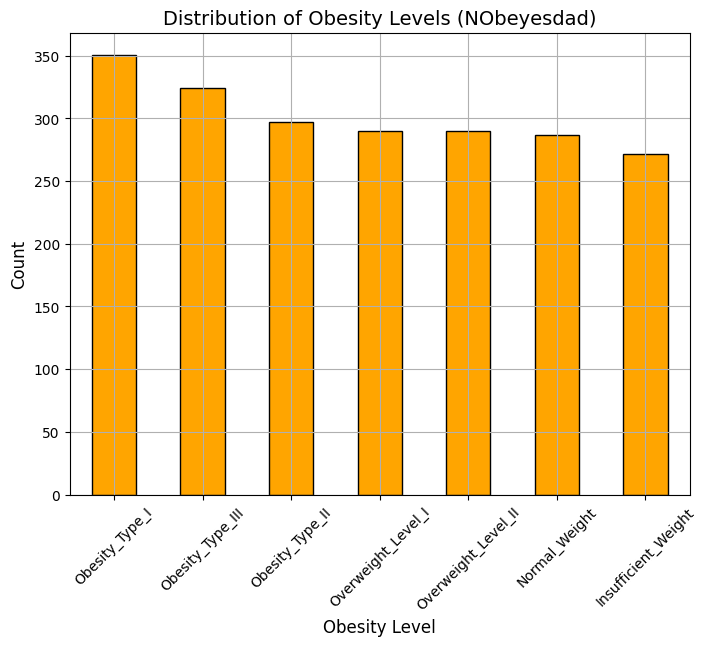

In [30]:
# Visualize the distribution of the 'NObeyesdad' column (target variable)
plt.figure(figsize=(8, 6))
df['NObeyesdad'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Obesity Levels (NObeyesdad)', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
# Check for missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [32]:
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [33]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(18)

In [34]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [35]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [36]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [37]:
df.nunique()

,0
Age,1215
Gender,2
Height,1361
Weight,1321
CALC,4
FAVC,2
FCVC,702
NCP,551
SCC,2
SMOKE,2


In [38]:
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        pass
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 non-null   float64
 1   Gender                          1793 non-null   object 
 2   Height                          1793 non-null   float64
 3   Weight                          1793 non-null   float64
 4   CALC                            1793 non-null   object 
 5   FAVC                            1793 non-null   object 
 6   FCVC                            1793 non-null   float64
 7   NCP                             1793 non-null   float64
 8   SCC                             1793 non-null   object 
 9   SMOKE                           1793 non-null   object 
 10  CH2O                            1793 non-null   float64
 11  family_history_with_overweight  1793 non-null   object 
 12  FAF                             1793 no

In [39]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 non-null   float64
 1   Gender                          1793 non-null   int64  
 2   Height                          1793 non-null   float64
 3   Weight                          1793 non-null   float64
 4   CALC                            1793 non-null   int64  
 5   FAVC                            1793 non-null   int64  
 6   FCVC                            1793 non-null   float64
 7   NCP                             1793 non-null   float64
 8   SCC                             1793 non-null   int64  
 9   SMOKE                           1793 non-null   int64  
 10  CH2O                            1793 non-null   float64
 11  family_history_with_overweight  1793 non-null   int64  
 12  FAF                             1793 no

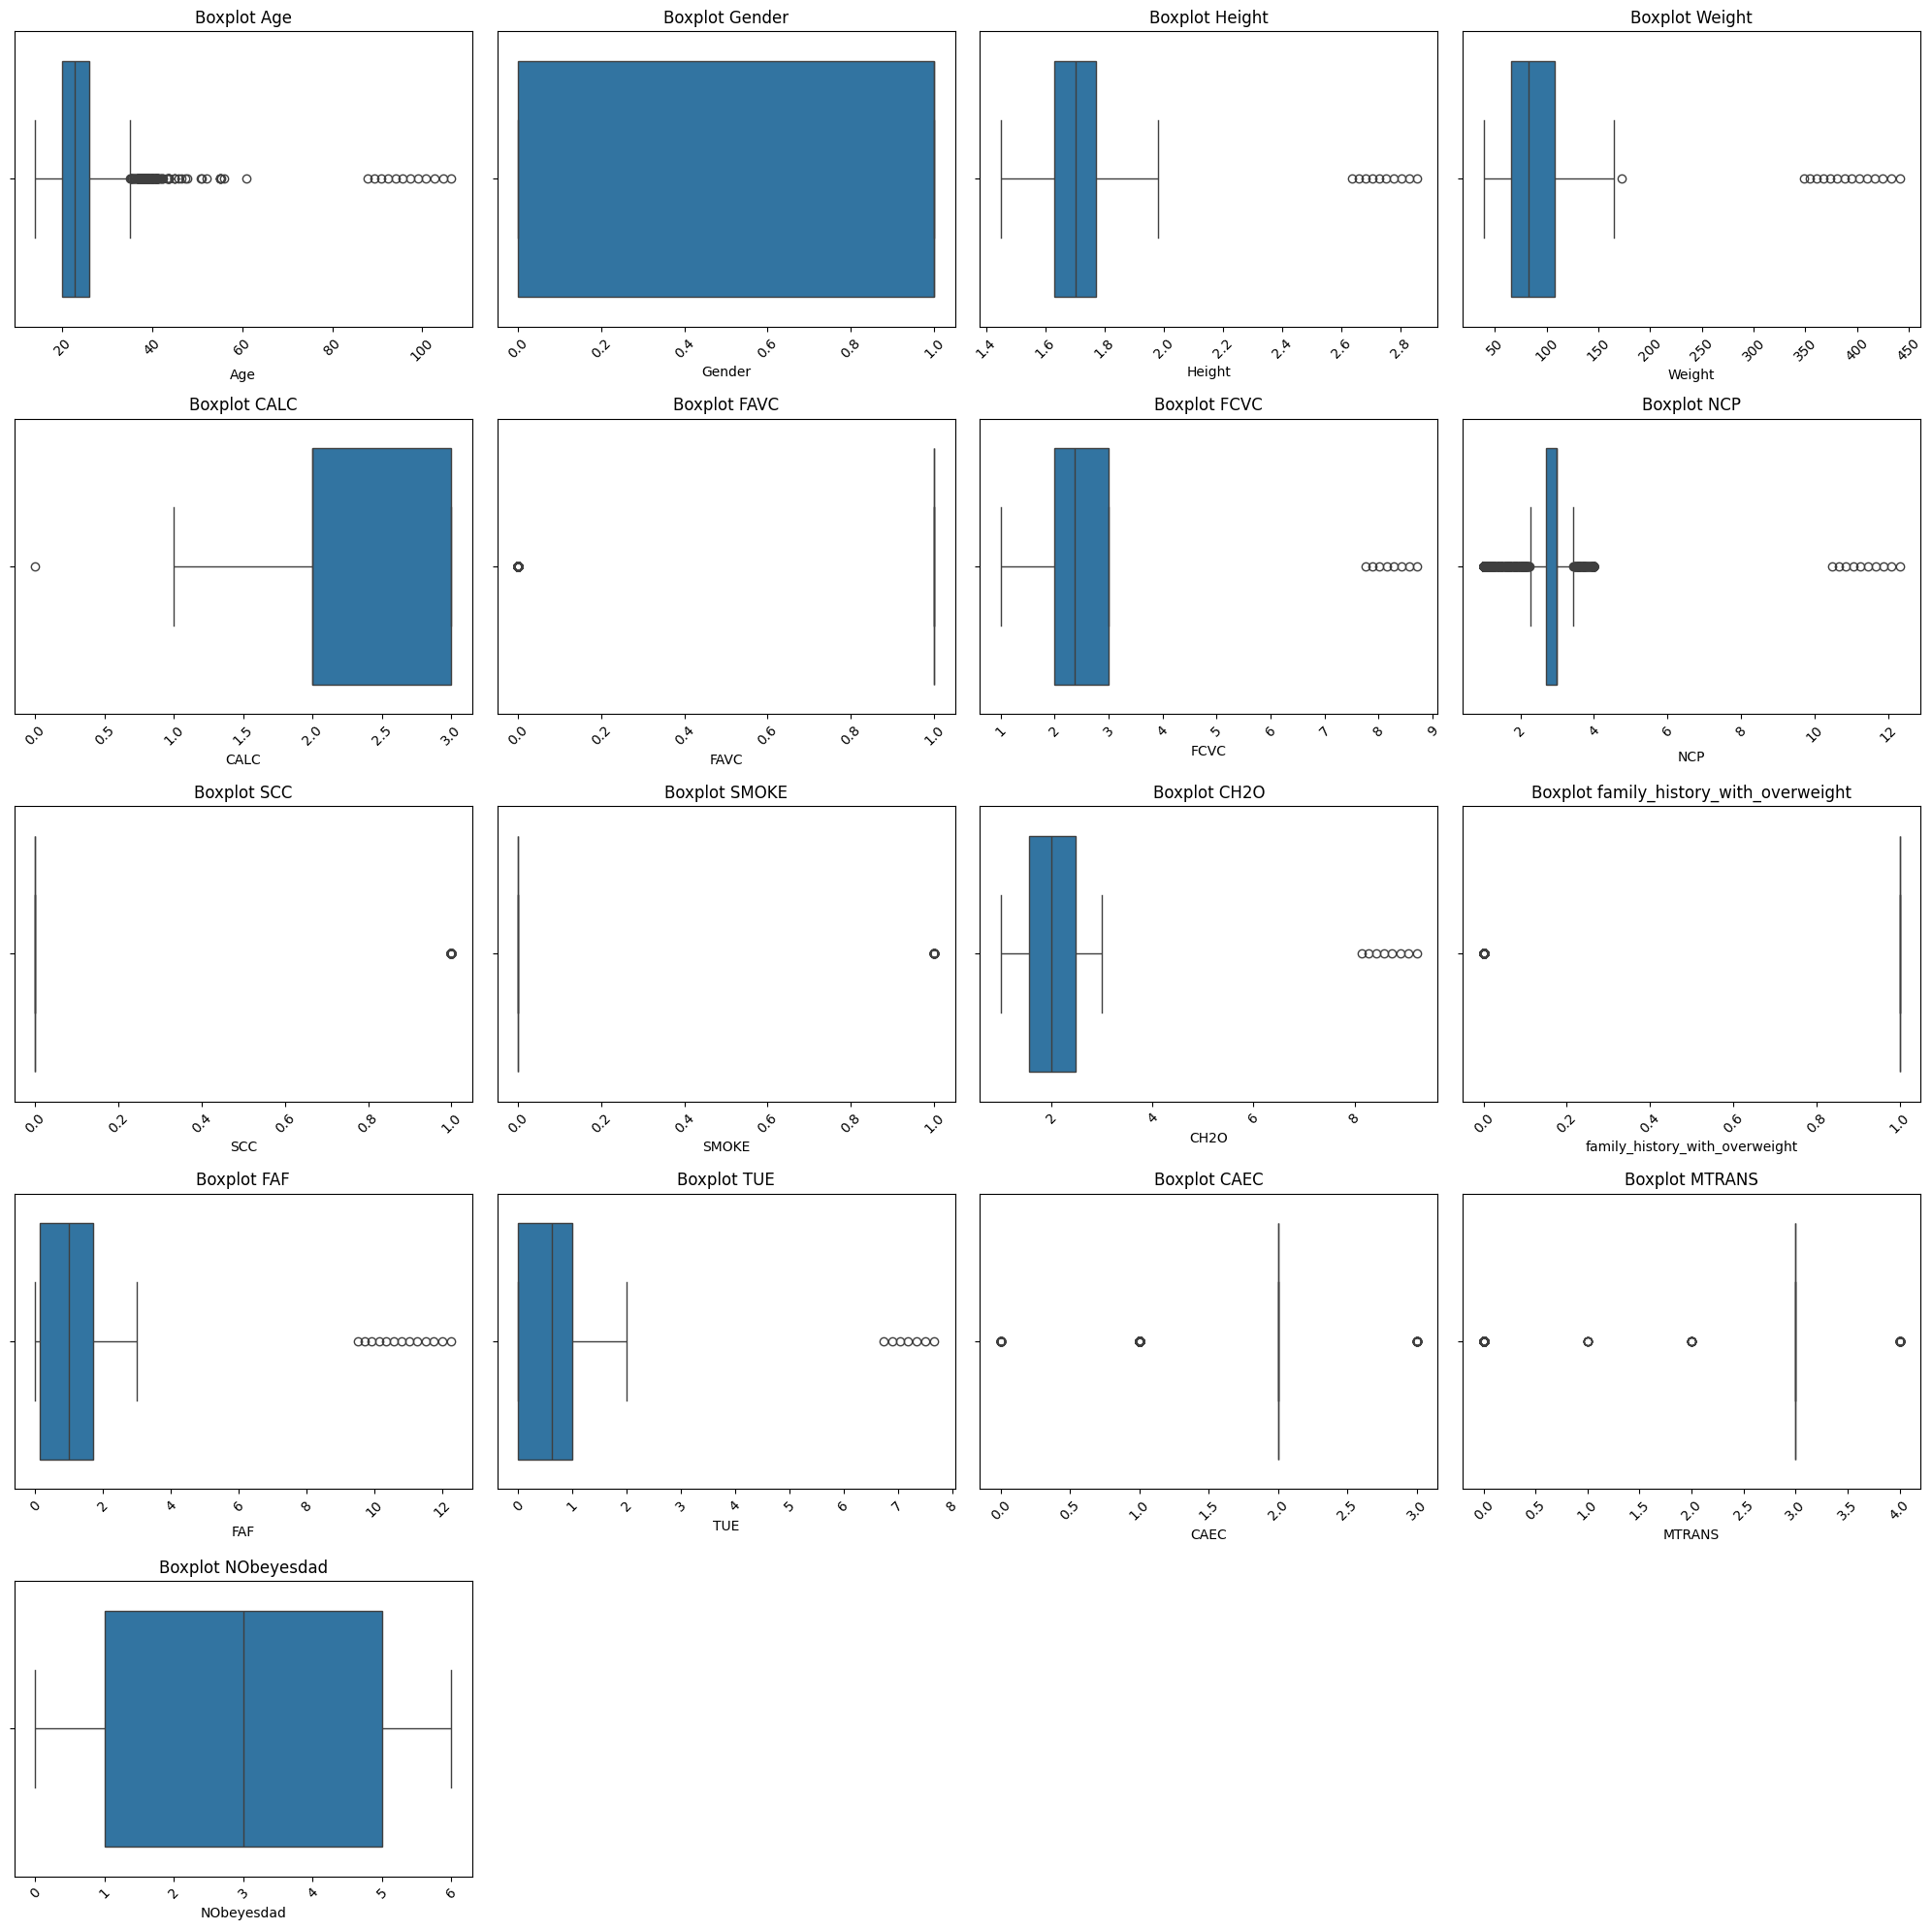

In [41]:
# Check if the dataset has numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# If there are numerical columns, proceed with the plotting
if len(numeric_cols) > 0:
    n_cols = 4
    n_plots = len(numeric_cols)
    import math
    n_rows = math.ceil(n_plots / n_cols)

    # Create grid subplot
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()  # so that it can be accessed with a 1D index

    # Loop and create boxplots for each subplot
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove any empty subplot if there are fewer plots than subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns detected in the dataset.")
